In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
#read the data
data=pd.read_csv("diabetes.csv")
data.describe()

,-1,-0.294118,0.487437,0.180328,-0.292929,-1.1,0.00149028,-0.53117,-0.0333333
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,758.000000
mean,0.303781,-0.547972,0.214665,0.131511,-0.585503,-0.810162,-0.047343,-0.662417,-0.599912
std,0.953364,0.396574,0.321392,0.320099,0.322304,0.273128,0.237189,0.284375,0.388364
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858241,-0.900000
50%,1.000000,-0.647059,0.175879,0.180328,-0.535354,-0.914894,-0.046200,-0.747225,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.696217,0.090909,-0.530743,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#check the data
print("Total remaining NaNs:", data.isna().sum().sum())
print(data.isna().sum())

Total remaining NaNs: 9
-1            0
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
-1.1          0
0.00149028    0
-0.53117      0
-0.0333333    9
dtype: int64


In [5]:
#using drop method to deal with the missing values
data_cleaned = data.dropna(axis=0,how='any')
print(data_cleaned.isna().sum())

-1            0
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
-1.1          0
0.00149028    0
-0.53117      0
-0.0333333    0
dtype: int64


In [6]:
data_cleaned.describe()

,-1,-0.294118,0.487437,0.180328,-0.292929,-1.1,0.00149028,-0.53117,-0.0333333
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,0.308707,-0.554245,0.211612,0.130326,-0.585246,-0.812088,-0.046801,-0.664747,-0.599912
std,0.951785,0.393625,0.321504,0.317791,0.322328,0.273101,0.235829,0.282436,0.388364
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858882,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.936170,-0.046200,-0.750213,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.702719,0.087929,-0.534799,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\1948913909.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\1948913909.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\1948913909.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_

Epoch [40/2000], Train Loss: 0.7296, Train Accuracy: 34.91%, Validation Loss: 0.7304, Validation Accuracy: 31.32%
Epoch [80/2000], Train Loss: 0.7080, Train Accuracy: 35.38%, Validation Loss: 0.7064, Validation Accuracy: 35.71%
Epoch [120/2000], Train Loss: 0.6920, Train Accuracy: 56.60%, Validation Loss: 0.6883, Validation Accuracy: 57.14%
Epoch [160/2000], Train Loss: 0.6800, Train Accuracy: 63.21%, Validation Loss: 0.6745, Validation Accuracy: 66.48%
Epoch [200/2000], Train Loss: 0.6708, Train Accuracy: 63.92%, Validation Loss: 0.6639, Validation Accuracy: 65.38%
Epoch [240/2000], Train Loss: 0.6637, Train Accuracy: 63.92%, Validation Loss: 0.6556, Validation Accuracy: 65.93%
Epoch [280/2000], Train Loss: 0.6581, Train Accuracy: 63.92%, Validation Loss: 0.6490, Validation Accuracy: 65.93%
Epoch [320/2000], Train Loss: 0.6536, Train Accuracy: 63.92%, Validation Loss: 0.6436, Validation Accuracy: 65.38%
Epoch [360/2000], Train Loss: 0.6498, Train Accuracy: 63.92%, Validation Loss: 0.6

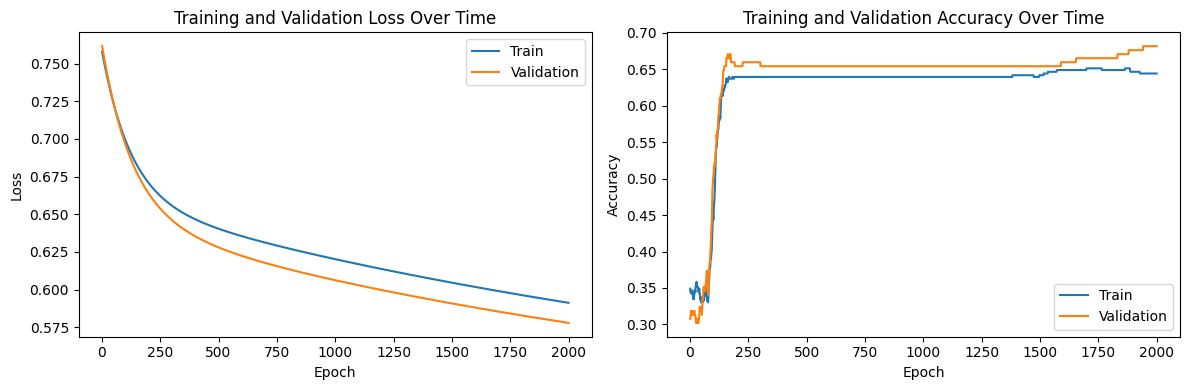

Test Accuracy: 69.08%


In [72]:
#split the data into several datasets
X = data_cleaned.iloc[:, 1:]
y = data_cleaned.iloc[:, 0]    
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.3, random_state=30)
X_train= torch.FloatTensor(np.array(X_train))
X_test=torch.FloatTensor(np.array(X_test))
y_train=torch.FloatTensor(np.array(y_train))
y_test=torch.FloatTensor(np.array(y_test))
X_val=torch.FloatTensor(np.array(X_val))
y_val=torch.FloatTensor(np.array(y_val))
#define the first model,only one linear layer and a sigmoid funtction
model=None
class SimplePerceptron(nn.Module):
    def __init__(self, input_size):
        super(SimplePerceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# create the object
input_size = X_train.shape[1]
model = SimplePerceptron(input_size)

# using BCEloss and sgd optimizer 
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=0.005)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)


X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor((y_val + 1) / 2, dtype=torch.float32)

# train the network
num_epochs = 2000
train_losses = []  
train_accuracies = []  
val_losses = []  
val_accuracies = []  

for epoch in range(num_epochs):

    outputs = model(X_train)
    
    
    loss = criterion(outputs, y_train.view(-1, 1))
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    train_losses.append(loss.item())
    
    
    with torch.no_grad():
        y_pred = model(X_train)
        y_pred = (y_pred >= 0.5).int()
        accuracy = (y_pred == y_train.view(-1, 1)).sum().item() / y_train.size(0)
        train_accuracies.append(accuracy)
    
    
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        val_losses.append(val_loss.item())
        
        val_pred = (val_outputs >= 0.5).int()
        val_accuracy = (val_pred == y_val.view(-1, 1)).sum().item() / y_val.size(0)
        val_accuracies.append(val_accuracy)
    
    # print the information 
    if (epoch + 1) % 40== 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Train Accuracy: {accuracy * 100:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

print("Training finished")

# plot the result
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# test the accuracy
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).int()
accuracy = (y_pred == y_test.view(-1, 1)).sum().item() / y_test.size(0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\3462613156.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\3462613156.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\3462613156.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_

Epoch [40/2000], Train Loss: 0.7714, Train Accuracy: 55.92%, Validation Loss: 0.7673, Validation Accuracy: 40.66%
Epoch [80/2000], Train Loss: 0.7545, Train Accuracy: 55.92%, Validation Loss: 0.7501, Validation Accuracy: 39.56%
Epoch [120/2000], Train Loss: 0.7398, Train Accuracy: 55.92%, Validation Loss: 0.7348, Validation Accuracy: 41.21%
Epoch [160/2000], Train Loss: 0.7263, Train Accuracy: 55.92%, Validation Loss: 0.7208, Validation Accuracy: 43.96%
Epoch [200/2000], Train Loss: 0.7138, Train Accuracy: 55.92%, Validation Loss: 0.7078, Validation Accuracy: 43.41%
Epoch [240/2000], Train Loss: 0.7020, Train Accuracy: 55.92%, Validation Loss: 0.6953, Validation Accuracy: 45.60%
Epoch [280/2000], Train Loss: 0.6913, Train Accuracy: 55.92%, Validation Loss: 0.6835, Validation Accuracy: 47.80%
Epoch [320/2000], Train Loss: 0.6815, Train Accuracy: 55.92%, Validation Loss: 0.6727, Validation Accuracy: 52.20%
Epoch [360/2000], Train Loss: 0.6724, Train Accuracy: 55.92%, Validation Loss: 0.6

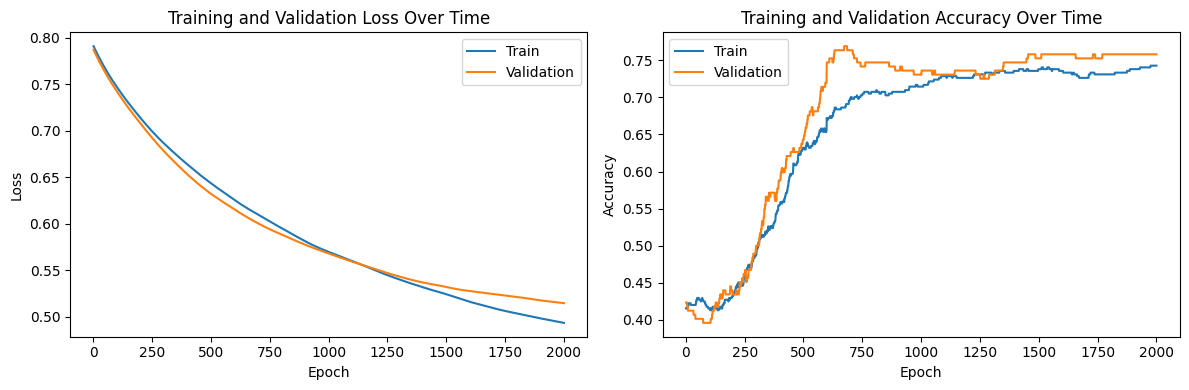

Test Accuracy: 57.24%


In [75]:
#define another model,using 3 linear layers,batch normalization layers and relu actvation function
X = data_cleaned.iloc[:, 1:]
y = data_cleaned.iloc[:, 0]    
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.3, random_state=30)
X_train= torch.FloatTensor(np.array(X_train))
X_test=torch.FloatTensor(np.array(X_test))
y_train=torch.FloatTensor(np.array(y_train))
y_test=torch.FloatTensor(np.array(y_test))
X_val=torch.FloatTensor(np.array(X_val))
y_val=torch.FloatTensor(np.array(y_val))
model2=None
optimizer=None
y_pred=None
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 4) 
        self.bn1 = nn.BatchNorm1d(4)  
        self.relu1 = torch.nn.ReLU()
        
        self.fc2 = nn.Linear(4, 4)
        self.bn2 = nn.BatchNorm1d(4)  
        self.relu2 = torch.nn.ReLU()
        
        self.fc3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        x = self.sigmoid(x)
        
        return x



input_size = X_train.shape[1]
model2 = SimpleNeuralNetwork(input_size)


criterion = nn.BCELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.005)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)


X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor((y_val + 1) / 2, dtype=torch.float32)

num_epochs = 2000
train_losses = []  
train_accuracies = []  
val_losses = []  
val_accuracies = []  

for epoch in range(num_epochs):

    outputs = model2(X_train)
    
 
    loss = criterion(outputs, y_train.view(-1, 1))
    

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  
    train_losses.append(loss.item())
    

    with torch.no_grad():
        y_pred_train = model2(X_train)
        y_pred_train = (y_pred_train >= 0.5).int()
        accuracy_train = (y_pred_train == y_train.view(-1, 1)).sum().item() / y_train.size(0)
        train_accuracies.append(accuracy_train)
    
  
    with torch.no_grad():
        val_outputs = model2(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        val_losses.append(val_loss.item())
        
        val_pred = (val_outputs >= 0.5).int()
        val_accuracy = (val_pred == y_val.view(-1, 1)).sum().item() / y_val.size(0)
        val_accuracies.append(val_accuracy)
    
   
    if (epoch + 1) % 40 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Train Accuracy: {accuracy * 100:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

print("Training finished")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


model2.eval()
with torch.no_grad():
    y_pred = model2(X_test)
    y_pred = (y_pred >= 0.5).int()
accuracy = (y_pred == y_test.view(-1, 1)).sum().item() / y_test.size(0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\391697611.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\391697611.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7732\391697611.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_773

Epoch [40/800], Train Loss: 0.7697, Train Accuracy: 36.08%, Validation Loss: 0.7815, Validation Accuracy: 34.62%
Epoch [80/800], Train Loss: 0.7505, Train Accuracy: 36.08%, Validation Loss: 0.7599, Validation Accuracy: 34.62%
Epoch [120/800], Train Loss: 0.7355, Train Accuracy: 36.08%, Validation Loss: 0.7433, Validation Accuracy: 34.62%
Epoch [160/800], Train Loss: 0.7232, Train Accuracy: 36.08%, Validation Loss: 0.7300, Validation Accuracy: 34.62%
Epoch [200/800], Train Loss: 0.7131, Train Accuracy: 37.97%, Validation Loss: 0.7190, Validation Accuracy: 39.01%
Epoch [240/800], Train Loss: 0.7047, Train Accuracy: 44.58%, Validation Loss: 0.7098, Validation Accuracy: 43.96%
Epoch [280/800], Train Loss: 0.6976, Train Accuracy: 48.82%, Validation Loss: 0.7021, Validation Accuracy: 48.35%
Epoch [320/800], Train Loss: 0.6916, Train Accuracy: 54.01%, Validation Loss: 0.6954, Validation Accuracy: 52.20%
Epoch [360/800], Train Loss: 0.6864, Train Accuracy: 57.55%, Validation Loss: 0.6897, Vali

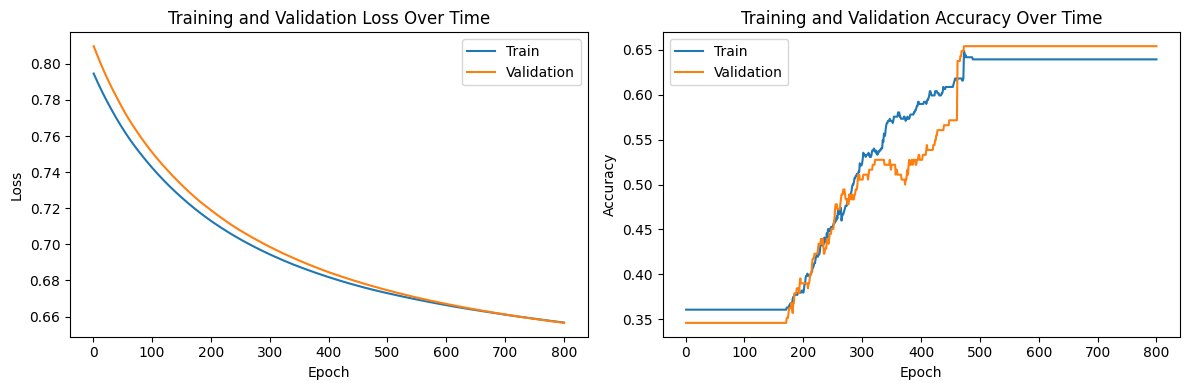

Test Accuracy: 69.74%


In [77]:
#using the structure like before, but this time add 6 layers in total
X = data_cleaned.iloc[:, 1:]
y = data_cleaned.iloc[:, 0]    
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.3, random_state=30)
X_train= torch.FloatTensor(np.array(X_train))
X_test=torch.FloatTensor(np.array(X_test))
y_train=torch.FloatTensor(np.array(y_train))
y_test=torch.FloatTensor(np.array(y_test))
X_val=torch.FloatTensor(np.array(X_val))
y_val=torch.FloatTensor(np.array(y_val))
model3=None
class SimpleNeuralNetwork1(nn.Module):
    def __init__(self, input_size):
        super(SimpleNeuralNetwork1, self).__init__()
        self.fc1 = nn.Linear(input_size, 4)
        self.bn1 = nn.BatchNorm1d(4)  
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(4, 4)
        self.bn2 = nn.BatchNorm1d(4)  
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(4, 4)
        self.bn3 = nn.BatchNorm1d(4)  
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(4, 4)
        self.bn4 = nn.BatchNorm1d(4)  
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(4, 4)
        self.bn5 = nn.BatchNorm1d(4)  
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu5(x)
        
        x = self.fc6(x)
        x = self.sigmoid(x)
        
        return x



input_size = X_train.shape[1]
model3 = SimpleNeuralNetwork1(input_size)


criterion = nn.BCELoss()
optimizer = optim.SGD(model3.parameters(), lr=0.005)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)


X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor((y_val + 1) / 2, dtype=torch.float32)


num_epochs = 800
train_losses = []  
train_accuracies = []  
val_losses = []  
val_accuracies = []  

for epoch in range(num_epochs):
    
    outputs = model3(X_train)
    
    
    loss = criterion(outputs, y_train.view(-1, 1))
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    train_losses.append(loss.item())
    
    
    with torch.no_grad():
        y_pred = model3(X_train)
        y_pred = (y_pred >= 0.5).int()
        accuracy = (y_pred == y_train.view(-1, 1)).sum().item() / y_train.size(0)
        train_accuracies.append(accuracy)
    
    
    with torch.no_grad():
        val_outputs = model3(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        val_losses.append(val_loss.item())
        
        val_pred = (val_outputs >= 0.5).int()
        val_accuracy = (val_pred == y_val.view(-1, 1)).sum().item() / y_val.size(0)
        val_accuracies.append(val_accuracy)
    
    
    if (epoch + 1) % 40 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Train Accuracy: {accuracy * 100:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

print("Training finished")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


model3.eval()
with torch.no_grad():
    y_pred = model3(X_test)
    y_pred = (y_pred >= 0.5).int()
accuracy = (y_pred == y_test.view(-1, 1)).sum().item() / y_test.size(0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

C:\Users\Acer\AppData\Local\Temp\ipykernel_11584\4150682098.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_11584\4150682098.py:119: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipykernel_11584\4150682098.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\Acer\AppData\Local\Temp\ipyk

Epoch [35/400], Train Loss: 0.6378, Train Accuracy: 74.06%, Validation Loss: 0.7339, Validation Accuracy: 36.26%
Epoch [70/400], Train Loss: 0.6137, Train Accuracy: 76.65%, Validation Loss: 0.7268, Validation Accuracy: 38.46%
Epoch [105/400], Train Loss: 0.5954, Train Accuracy: 77.83%, Validation Loss: 0.7304, Validation Accuracy: 62.64%
Epoch [140/400], Train Loss: 0.5805, Train Accuracy: 79.01%, Validation Loss: 0.7311, Validation Accuracy: 61.54%
Epoch [175/400], Train Loss: 0.5673, Train Accuracy: 79.01%, Validation Loss: 0.7318, Validation Accuracy: 62.64%
Epoch [210/400], Train Loss: 0.5561, Train Accuracy: 79.48%, Validation Loss: 0.7353, Validation Accuracy: 63.19%
Epoch [245/400], Train Loss: 0.5481, Train Accuracy: 80.19%, Validation Loss: 0.7242, Validation Accuracy: 61.54%
Epoch [280/400], Train Loss: 0.5395, Train Accuracy: 80.19%, Validation Loss: 0.7277, Validation Accuracy: 60.99%
Epoch [315/400], Train Loss: 0.5334, Train Accuracy: 80.19%, Validation Loss: 0.7243, Vali

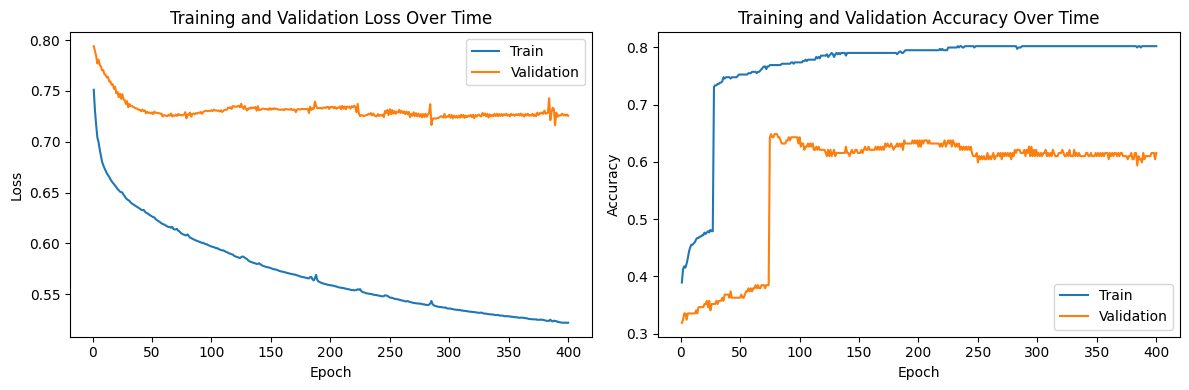

Test Accuracy: 52.63%


In [25]:
#using the structure like before, but this time add 11 layers in total and enlarge the number of neurons 
X = data_cleaned.iloc[:, 1:]
y = data_cleaned.iloc[:, 0]    
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.3, random_state=30)
X_train= torch.FloatTensor(np.array(X_train))
X_test=torch.FloatTensor(np.array(X_test))
y_train=torch.FloatTensor(np.array(y_train))
y_test=torch.FloatTensor(np.array(y_test))
X_val=torch.FloatTensor(np.array(X_val))
y_val=torch.FloatTensor(np.array(y_val))
model3=None
import torch
import torch.nn as nn

class SimpleNeuralNetwork1(nn.Module):
    def __init__(self, input_size):
        super(SimpleNeuralNetwork1, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(128, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(128, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(32, 16)
        self.bn4 = nn.BatchNorm1d(16)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(16, 4)
        self.bn5 = nn.BatchNorm1d(4)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(4, 4)
        self.bn6 = nn.BatchNorm1d(4)
        self.relu6 = nn.ReLU()
        
        self.fc7 = nn.Linear(4, 4)
        self.bn7 = nn.BatchNorm1d(4)
        self.relu7 = nn.ReLU()
        
        self.fc8 = nn.Linear(4, 4)
        self.bn8 = nn.BatchNorm1d(4)
        self.relu8 = nn.ReLU()
        
        self.fc9 = nn.Linear(4, 4)
        self.bn9 = nn.BatchNorm1d(4)
        self.relu9 = nn.ReLU()

        self.fc10 = nn.Linear(4, 4)
        self.bn10 = nn.BatchNorm1d(4)
        self.relu10 = nn.ReLU()
        
        self.fc11 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu5(x)
        
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu6(x)
        
        x = self.fc7(x)
        x = self.bn7(x)
        x = self.relu7(x)
        
        x = self.fc8(x)
        x = self.bn8(x)
        x = self.relu8(x)
        
        x = self.fc9(x)
        x = self.bn9(x)
        x = self.relu9(x)

        x = self.fc10(x)
        x = self.bn10(x)
        x = self.relu10(x)
        
        x = self.fc11(x)
        x = self.sigmoid(x)
        
        return x




input_size = X_train.shape[1]
model3 = SimpleNeuralNetwork1(input_size)


criterion = nn.BCELoss()
optimizer = optim.SGD(model3.parameters(), lr=0.005)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor((y_train + 1) / 2, dtype=torch.float32)


X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor((y_val + 1) / 2, dtype=torch.float32)


num_epochs = 400
train_losses = [] 
train_accuracies = []  
val_losses = []  
val_accuracies = []  

for epoch in range(num_epochs):
    
    outputs = model3(X_train)
    
    
    loss = criterion(outputs, y_train.view(-1, 1))
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    train_losses.append(loss.item())
    
    
    with torch.no_grad():
        y_pred = model3(X_train)
        y_pred = (y_pred >= 0.5).int()
        accuracy = (y_pred == y_train.view(-1, 1)).sum().item() / y_train.size(0)
        train_accuracies.append(accuracy)
    
    
    with torch.no_grad():
        val_outputs = model3(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        val_losses.append(val_loss.item())
        
        val_pred = (val_outputs >= 0.5).int()
        val_accuracy = (val_pred == y_val.view(-1, 1)).sum().item() / y_val.size(0)
        val_accuracies.append(val_accuracy)
    
    
    if (epoch + 1) % 35 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Train Accuracy: {accuracy * 100:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

print("Training finished")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


model3.eval()
with torch.no_grad():
    y_pred = model3(X_test)
    y_pred = (y_pred >= 0.5).int()
accuracy = (y_pred == y_test.view(-1, 1)).sum().item() / y_test.size(0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')